In [1]:
import matplotlib.pyplot as plt
import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.width', None)
import numpy as np

In [2]:
Test_data = pd.read_table("Test_Iris.txt",sep=" ", header=None,names=["SL","SW","PL","PS"])
print(Test_data)


      SL   SW   PL   PS
0    5.7  4.4  1.5  0.4
1    5.5  4.2  1.4  0.2
2    5.2  4.1  1.5  0.1
3    5.8  4.0  1.2  0.2
4    5.4  3.9  1.7  0.4
5    5.4  3.9  1.3  0.4
6    7.7  3.8  6.7  2.2
7    7.9  3.8  6.4  2.0
8    5.1  3.8  1.9  0.4
9    5.7  3.8  1.7  0.3
10   5.1  3.8  1.6  0.2
11   5.1  3.8  1.5  0.3
12   5.1  3.7  1.5  0.4
13   5.4  3.7  1.5  0.2
14   5.3  3.7  1.5  0.2
15   7.2  3.6  6.1  2.5
16   5.0  3.6  1.4  0.2
17   4.6  3.6  1.0  0.2
18   5.0  3.5  1.6  0.6
19   5.2  3.5  1.5  0.2
20   5.1  3.5  1.4  0.3
21   5.1  3.5  1.4  0.2
22   5.0  3.5  1.3  0.3
23   5.5  3.5  1.3  0.2
24   6.3  3.4  5.6  2.4
25   6.2  3.4  5.4  2.3
26   6.0  3.4  4.5  1.6
27   4.8  3.4  1.9  0.2
28   5.4  3.4  1.7  0.2
29   5.0  3.4  1.6  0.4
30   4.8  3.4  1.6  0.2
31   5.4  3.4  1.5  0.4
32   5.1  3.4  1.5  0.2
33   5.0  3.4  1.5  0.2
34   4.6  3.4  1.4  0.3
35   5.2  3.4  1.4  0.2
36   6.3  3.3  6.0  2.5
37   6.7  3.3  5.7  2.5
38   6.7  3.3  5.7  2.1
39   6.3  3.3  4.7  1.6
40   5.1  3.3  1

In [3]:
from scipy.spatial.distance import cdist

def k_means(Test_data, K):
#Keep track of history so you can see K-means in action
    np.random.seed(35)
    centroids_history = []
    rand_index = np.random.choice(Test_data.shape[0], K)  
    centroids = Test_data[rand_index]
    centroids_history.append(centroids)
    while True:
        # Euclidean distances are calculated for each point relative to centroids, and then np.argmin returns
        # the index location of the minimal distance - which cluster a point is assigned to
        labels = np.argmin(cdist(Test_data, centroids,'seuclidean'), axis=1)
        
        #Take mean of points within clusters to find new centroids:
        new_centroids = np.array([Test_data[labels == i].mean(axis=0) for i in range(K)])
        
        
        # If old centroids and new centroids are same then it breaks, Otherwise continue
        if np.all(centroids == new_centroids):
            break
        centroids = new_centroids
    
    return centroids, labels

In [4]:
X_matrix = Test_data.values

In [5]:
centroids, labels = k_means(X_matrix, 3)

In [6]:
print(labels)
with open("output5.txt", "w") as out_file:
    for element in labels:
        print(element,file=out_file)

[1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1 1 1 0
 0 0 0 1 1 0 0 0 0 0 0 0 0 1 1 1 1 1 0 0 0 0 0 0 0 1 1 1 1 1 0 0 0 0 0 0 0
 0 0 2 0 2 2 2 2 2 0 2 2 2 1 1 1 1 1 1 0 0 2 2 2 2 2 2 2 1 0 0 0 0 2 2 2 2
 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 2
 2 2]


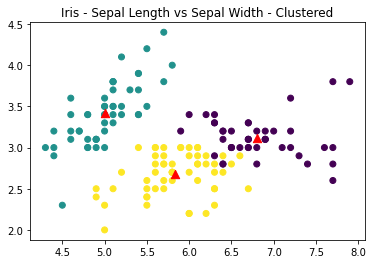

In [7]:
plt.scatter(Test_data['SL'], Test_data['SW'], c=labels, cmap='viridis')
plt.scatter(centroids[:,0], centroids[:,1], c="Red",s=70,marker="^", cmap='viridis')
plt.title('Iris - Sepal Length vs Sepal Width - Clustered')
plt.show()